In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, IBMQ, Aer
import numpy as np
from qiskit.visualization import *

import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools and circuits
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT

# Quantum Phase Estimation

We will work with through the example using the P gate where

\begin{align}
P|1> =
\begin{bmatrix} 1 & 0\\0 & e^{i \lambda}\end{bmatrix}
\begin{bmatrix}0\\1\end{bmatrix}
= e^{i \lambda}|1>.
\end{align}

Using the quantum phase estimation technique, we can determine the 
phase $\theta$ by
\begin{align}
P|1> = e^{2 i \pi \theta}|1>.
\end{align}

Solving for $\theta$ gives us $\lambda/2 \pi$.
For this example, let's let $\lambda = \pi/2$.
Thus, we expect to find that $\theta = 1/4$.
<br>
Below we have a total of $4$ qubits where qubits $0-2$ are counting qubits and qubit $3$ is the eigenstate of P.
We need to initialize qubit $3$ in state $|1>$ as shown above.

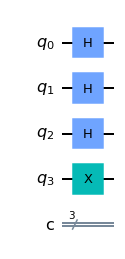

In [2]:
n = 4 #total number of qubits
qpe = QuantumCircuit(n,n-1)

#initialize last qubit to state |1>
qpe.x(3)

#apply H gates to counting qubits
for qubit in range(n-1):
    qpe.h(qubit)
    
qpe.draw('mpl')

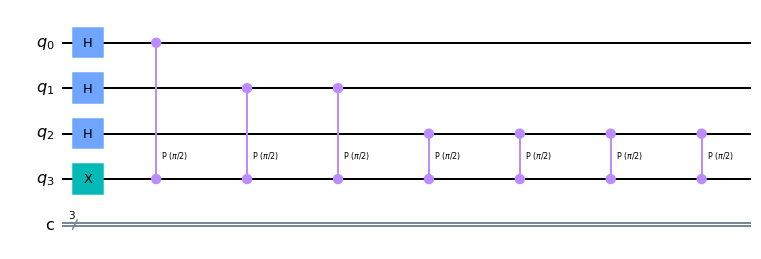

In [3]:
repetitions = 1
for counting_qubit in range(n-1):
    for i in range(repetitions):
        '''
        Perform rotations according to lambda = pi/2
        as stated above.
        '''
        qpe.cp(np.pi/2, counting_qubit, n-1)
    repetitions *= 2
    
qpe.draw('mpl')

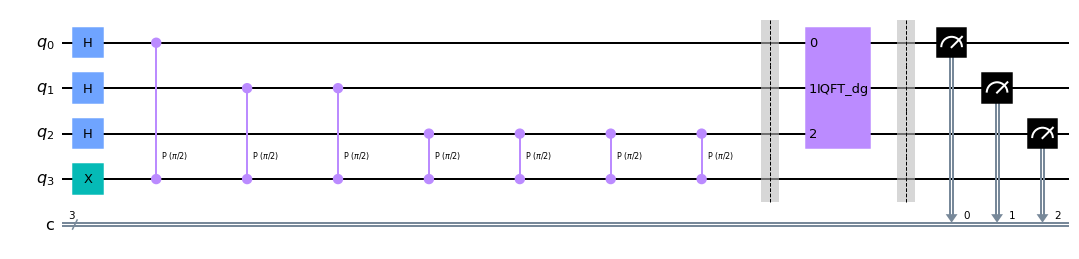

In [4]:
qpe.barrier()

#apply the inverse Fourier transform on counting qubits
qpe = qpe.compose(QFT(n-1,inverse=True), [0,1,2])
qpe.barrier()

#read out state of counting qubits
for i in range(n-1):
    qpe.measure(i,i)
    
qpe.draw('mpl')

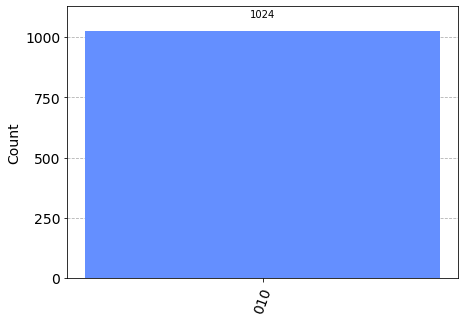

In [5]:
aer_sim = Aer.get_backend('aer_simulator')
trans_qpe = transpile(qpe, aer_sim)
results = aer_sim.run(trans_qpe, shots=1024).result()
answer = results.get_counts()

plot_histogram(answer)

In [6]:
binary = '010'
state = int(binary,2)
print(state)

2


In [7]:
theta = state/2**(n-1)
print(theta)

0.25


As we can see, our result predicted the correct phase shift for $\theta$.